<a href="https://colab.research.google.com/github/chinmayp995/CS-203-Assignment-5/blob/main/a5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install kaggle

In [ ]:
!pip install augly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.3/24.3 MB 61.9 MB/s eta 0:00:00
  Created wheel for iopath: filename=iopath-0.1.10-py3-none-any.whl size=31528 sha256=0e0c3174695c42ddeef45a3982f802fa54243e8f2cbfedc3bfbfc78e495c41b3
  Stored in directory: /root/.cache/pip/wheels/ba/5e/16/6117f8fe7e9c0c161a795e10d94645ebcf301ccbd01f66d8ec
Successfully built iopath


In [ ]:
#  https://huggingface.co/microsoft/resnet-50

In [ ]:
!unzip test.zip

Archive:  test.zip
   creating: cats/
  inflating: cats/cat_190.jpg        
  inflating: __MACOSX/cats/._cat_190.jpg  
  inflating: cats/cat_147.jpg        
  inflating: __MACOSX/cats/._cat_147.jpg  
  inflating: cats/cat_542.jpg        
  inflating: __MACOSX/cats/._cat_542.jpg  
  inflating: cats/cat_595.jpg        
  inflating: __MACOSX/cats/._cat_595.jpg  
  inflating: cats/cat_422.jpg        
  inflating: __MACOSX/cats/._cat_422.jpg  
  inflating: cats/cat_583.jpg        
  inflating: __MACOSX/cats/._cat_583.jpg  
  inflating: cats/cat_384.jpg        
  inflating: __MACOSX/cats/._cat_384.jpg  
  inflating: cats/cat_586.jpg        
  inflating: __MACOSX/cats/._cat_586.jpg  
  inflating: cats/cat_545.jpg        
  inflating: __MACOSX/cats/._cat_545.jpg  
  inflating: cats/cat_223.jpg        
  inflating: __MACOSX/cats/._cat_223.jpg  
  inflating: cats/cat_551.jpg        
  inflating: __MACOSX/cats/._cat_551.jpg  
  inflating: cats/cat_587.jpg        
  inflating: __MACOSX/cats/._cat_

In [ ]:
import os
import shutil
import random
import numpy as np
from glob import glob
from sklearn.model_selection import train_test_split
from PIL import Image
import augly.image as imaugs
import augly.utils as utils
import matplotlib.pyplot as plt

In [ ]:
cats_dataset_path = "/content/cats"
dogs_dataset_path = "/content/dogs"
train_path = "./dataset/train"
test_path = "./dataset/test"
os.makedirs(train_path, exist_ok=True)
os.makedirs(test_path, exist_ok=True)
cat_train_path="./dataset/train/cat"
cat_test_path="./dataset/test/cat"
dog_train_path="./dataset/train/dog"
dog_test_path="./dataset/test/dog"
os.makedirs(cat_train_path, exist_ok=True)
os.makedirs(cat_test_path, exist_ok=True)
os.makedirs(dog_train_path, exist_ok=True)
os.makedirs(dog_test_path, exist_ok=True)

In [ ]:
# Get all image files within the directories
cat_images = glob(os.path.join(cats_dataset_path, '*.jpg'))  # Assuming images are JPGs - adjust if necessary
dog_images = glob(os.path.join(dogs_dataset_path, '*.jpg'))

#creating the train test split
cat_train_images,cat_test_images=train_test_split(cat_images,test_size=0.2,random_state=42)
dog_train_images,dog_test_images=train_test_split(dog_images,test_size=0.2,random_state=42)

for img in cat_train_images:
    shutil.copy(img, os.path.join(cat_train_path, os.path.basename(img)))
for img in cat_test_images:
    shutil.copy(img, os.path.join(cat_test_path, os.path.basename(img)))
for img in dog_train_images:
    shutil.copy(img, os.path.join(dog_train_path, os.path.basename(img)))
for img in dog_test_images:
    shutil.copy(img, os.path.join(dog_test_path, os.path.basename(img)))


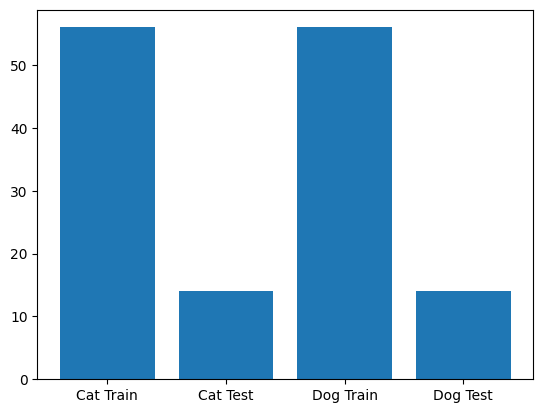

In [ ]:
y_ticks=["Cat Train","Cat Test","Dog Train","Dog Test"]
heights=[len(cat_train_images),len(cat_test_images),len(dog_train_images),len(dog_test_images)]
plt.bar(y_ticks,heights)
plt.show()

In [ ]:
def augment_image(img_path):
    img = Image.open(img_path).convert("RGB")

    aug_list = [
        imaugs.Rotate(degrees=random.uniform(-30, 30)),
        imaugs.Crop( x1=0.25, y1=0.25, x2=0.75, y2=0.75),
        imaugs.Blur(radius=random.uniform(1, 3)),
        imaugs.ColorJitter(brightness_factor=0.5, contrast_factor=0.5),
        imaugs.RandomEmojiOverlay(opacity=0.8),
        imaugs.OverlayText(text=[79, 66, 332, 903, 46], font_size=0.2),
        imaugs.PerspectiveTransform(sigma=1.0),
        imaugs.HFlip(),
        imaugs.VFlip(),
        imaugs.RandomNoise()
    ]

    # Apply 3 random augmentations in sequence
    aug_img = img
    for aug in random.sample(aug_list, 3):
      aug_img = aug(aug_img)

    return aug_img

In [30]:
cat_augmented_images = []
cat_train_images = glob(os.path.join(cat_train_path, "*.jpg"))
cat_augmented_path = "./dataset_augmented/cat_train_augmented"
os.makedirs(cat_augmented_path, exist_ok=True)

dog_augmented_images=[]
dog = glob(os.path.join(dog_train_path, "*.jpg"))
dog_augmented_path = "./dataset_augmented/dog_train_augmented"
os.makedirs(dog_augmented_path, exist_ok=True)

In [31]:
# Fix deprecated numpy float usage
np.float = float

for img_path in cat_train_images:
    for i in range(2):  # Twice the dataset size
        aug_img = augment_image(img_path)
        new_filename = os.path.join(cat_augmented_path, f"cat_aug_{i}_" + os.path.basename(img_path))
        aug_img.save(new_filename)
        cat_augmented_images.append(new_filename)

for img_path in dog_train_images:
    for i in range(2):  # Twice the dataset size
        aug_img = augment_image(img_path)
        new_filename = os.path.join(dog_augmented_path, f"dog_aug_{i}_" + os.path.basename(img_path))
        aug_img.save(new_filename)
        dog_augmented_images.append(new_filename)

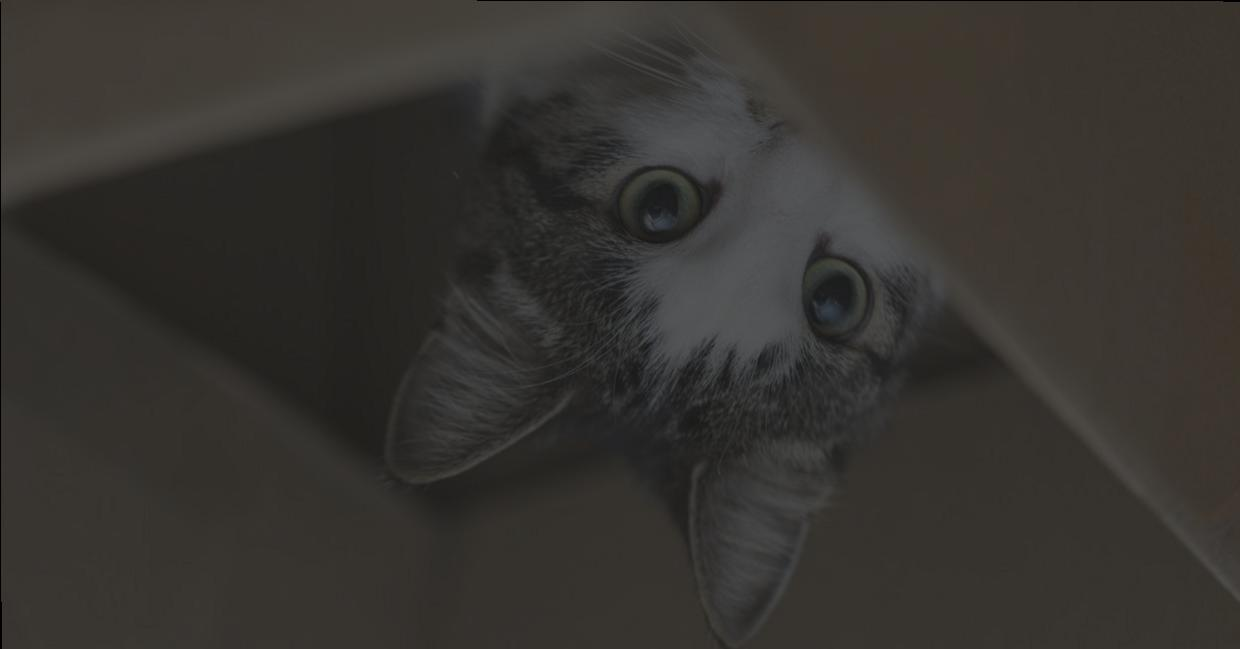

In [32]:
Image.open('/content/dataset_augmented/cat_train_augmented/cat_aug_0_cat_251.jpg')

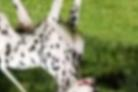

In [33]:
Image.open("/content/dataset_augmented/dog_train_augmented/dog_aug_0_dog_130.jpg")

In [34]:
len(cat_augmented_images)

112

# Task 2

In [ ]:
from transformers import ResNetForImageClassification

model = ResNetForImageClassification.from_pretrained("microsoft/resnet-50")

model.eval()

In [ ]:
from transformers import AutoFeatureExtractor, ResNetForImageClassification
import torch
from datasets import load_dataset

dataset = load_dataset("huggingface/cats-image")
image = dataset["test"]["image"][0]

feature_extractor = AutoFeatureExtractor.from_pretrained("microsoft/resnet-50")
model = ResNetForImageClassification.from_pretrained("microsoft/resnet-50")

inputs = feature_extractor(image, return_tensors="pt")

with torch.no_grad():
    logits = model(**inputs).logits

# model predicts one of the 1000 ImageNet classes
predicted_label = logits.argmax(-1).item()
print(model.config.id2label[predicted_label])